In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm    #import statsmodels for the stats models
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words'

In [ ]:
df.hist('shares', bins =1000)

In [ ]:
df.shares.describe()

In [5]:
morethan1400 = []
for row in df['shares']:
    if row > 1400:
        morethan1400.append(1)
    else:
        morethan1400.append(0)
df['morethan1400']= morethan1400

In [21]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,morethan1400
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1,0.815385,4,2,1,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1,0.791946,3,1,1,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1,0.663866,3,1,1,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1,0.665635,9,0,1,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1,0.540890,19,19,20,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1,0.698198,2,2,0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,0
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1,0.549834,21,20,20,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,0
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1,0.572108,20,20,20,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,0
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1,0.836735,2,0,0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,1
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1,0.797101,4,1,1,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,0


In [6]:
class_df = df.set_index('url')

In [23]:
class_df.columns.values

array(['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
y = class_df['morethan1400']
X = class_df.drop(['shares','timedelta','morethan1400'], axis=1)



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [12]:
indices

array([25, 24, 39, 26, 22, 38, 19, 28, 37, 41,  2,  4, 42,  9, 40,  1, 18,
       44, 48, 43, 51, 45, 27, 23,  5, 47, 46, 20,  0, 55, 52,  7, 53, 54,
        6, 49, 57, 56, 36, 50, 10, 12,  8, 21, 17, 14, 15, 16, 34, 31, 30,
       32, 29, 33, 35, 13, 11,  3])

In [37]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=140,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
names = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(names[f], importances[indices[f]])

Feature ranking:
25 0.0441701478403
24 0.0403397479861
39 0.0320748032405
26 0.0310630269146
22 0.0299399060761
38 0.0296053989848
19 0.0295062912906
28 0.0290335476452
37 0.0289959981871
41 0.0289755626318
2 0.0275551121262
4 0.0274227258316
42 0.0273766318502
9 0.0264684076404
40 0.026189826015
1 0.0260973671885
18 0.026008353264
44 0.025667613925
48 0.0253019851995
43 0.0249822951489
51 0.0239007806137
45 0.0234730243632
27 0.0233704386175
23 0.0229292032523
5 0.0209476393662
47 0.0207854377182
46 0.0204997664338
20 0.0170986023357
0 0.0159813467717
55 0.0151503035651
52 0.0147662049687
7 0.0146564092013
53 0.0139917122788
54 0.0132080201544
6 0.0131171460228
49 0.0126308214674
57 0.012214755994
56 0.0120562118959
36 0.0107369628418
50 0.0103369827474
10 0.0102201112286
12 0.00872094722916
8 0.00820986351989
21 0.00719481054065
17 0.00596238472383
14 0.00552286066119
15 0.0048831535046
16 0.00479030493579
34 0.00381118372656
31 0.00324082414296
30 0.00316603544914
32 0.0031268498153

In [27]:
plt.rcParams['axes.facecolor'] = 'd3d3d3'

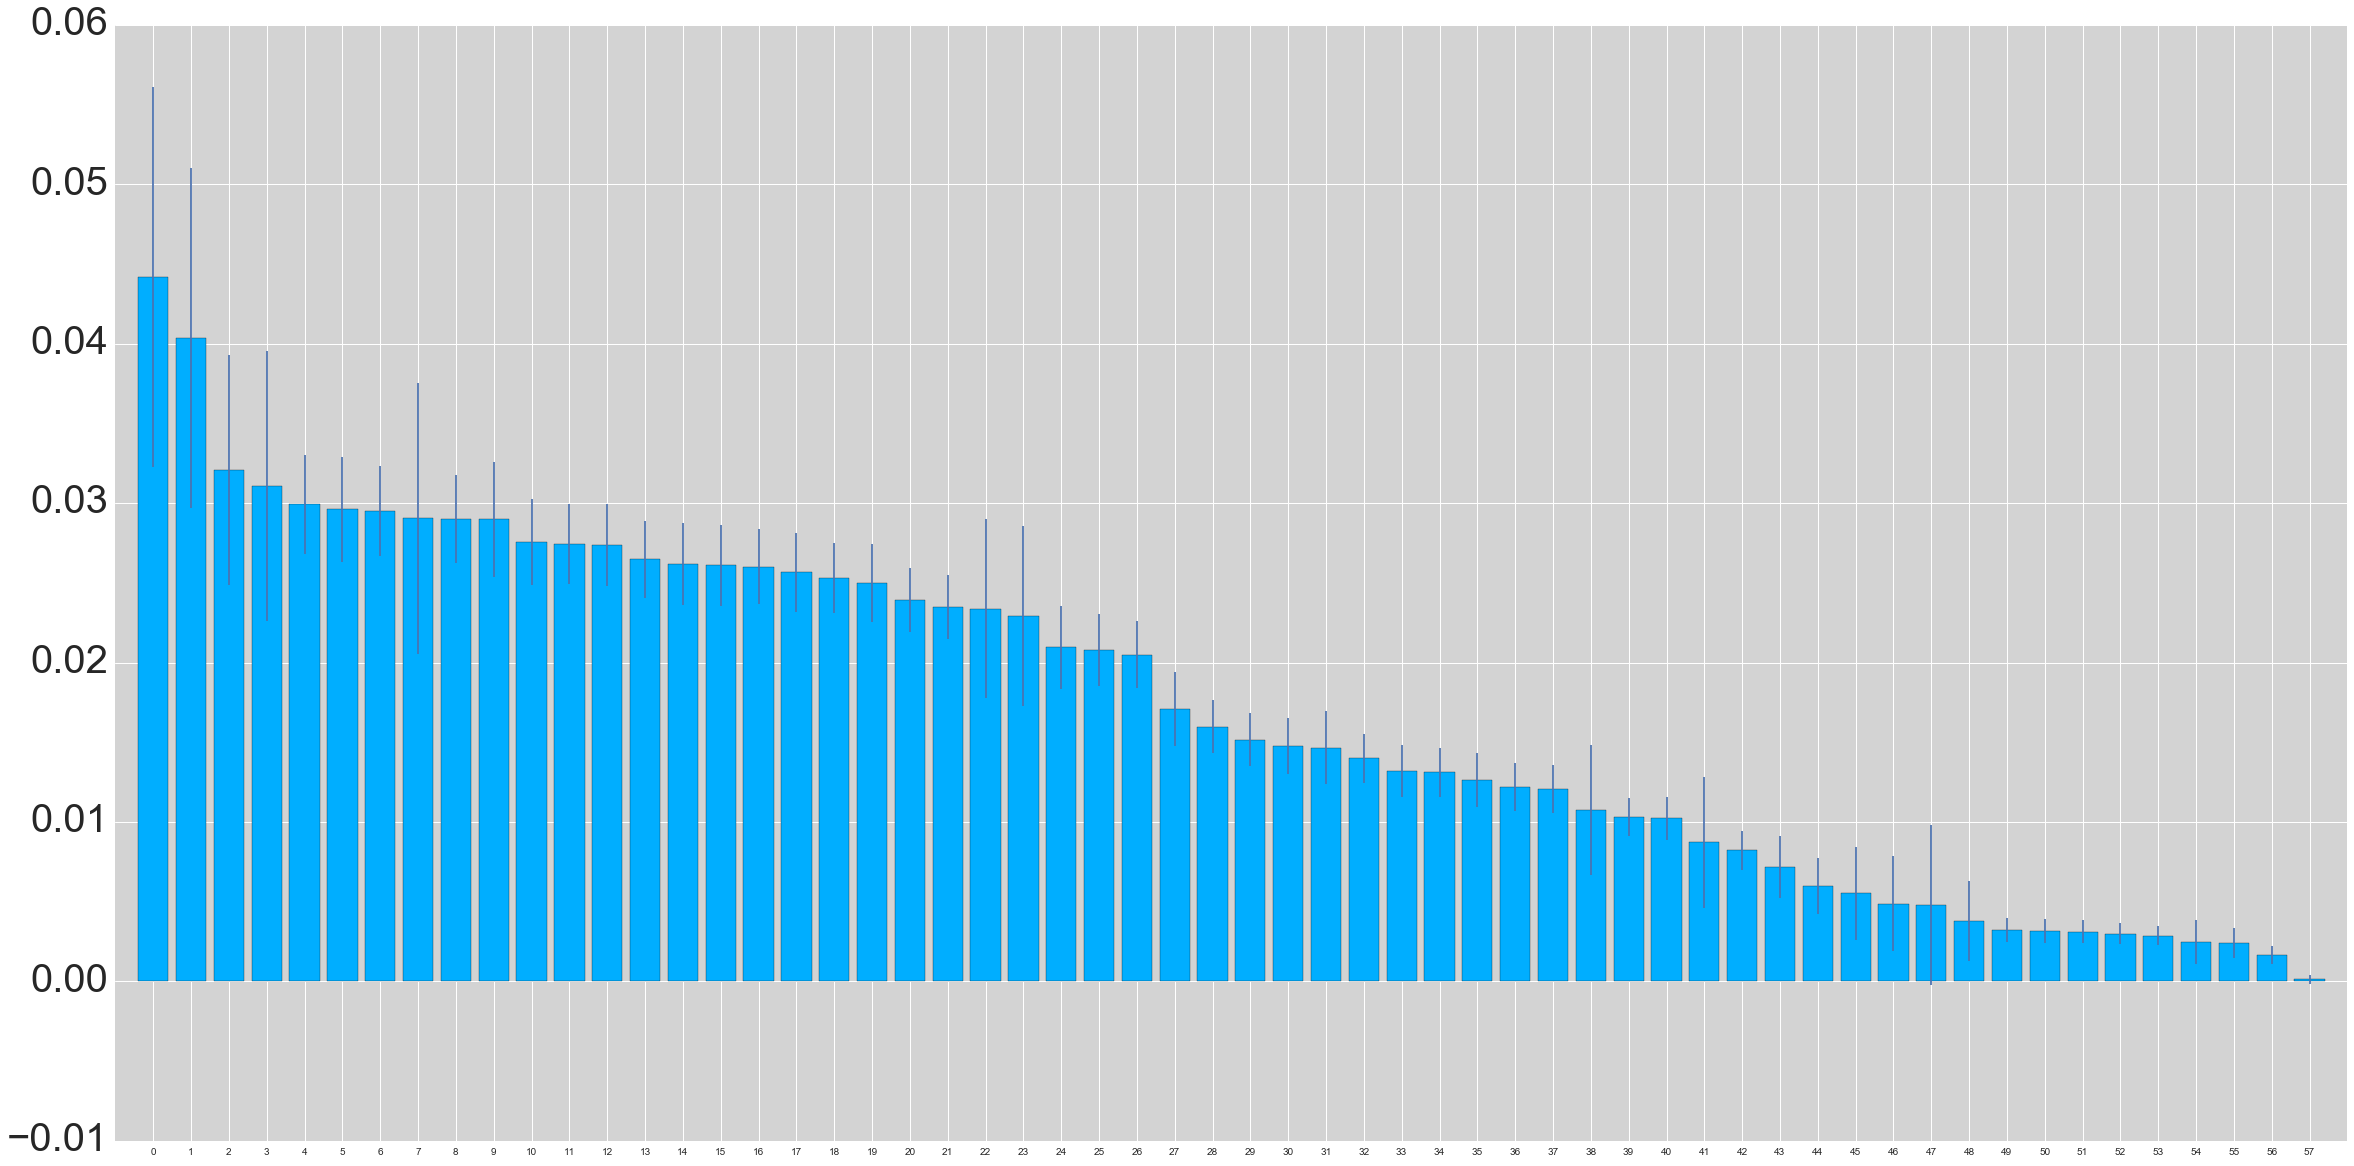

In [36]:
# Plot the feature importances of the forest

plt.figure(figsize=(40,20))
plt.title("")

plt.bar(range(X.shape[1]), importances[indices],
       color='#00aeff', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]))
plt.tick_params(axis='y',  labelsize=40)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
kneighbordict = {}
for i in range(20, 31):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    kneighbordict[i]=score
print (kneighbordict)
max(kneighbordict, key=kneighbordict.get)

In [13]:
names = X.columns.values
nums = []
for i in range(0, 58):
    nums.append(i)
zipped = zip(nums, names)
for i in zipped:
    print (i)

(0, 'n_tokens_title')
(1, 'n_tokens_content')
(2, 'n_unique_tokens')
(3, 'n_non_stop_words')
(4, 'n_non_stop_unique_tokens')
(5, 'num_hrefs')
(6, 'num_self_hrefs')
(7, 'num_imgs')
(8, 'num_videos')
(9, 'average_token_length')
(10, 'num_keywords')
(11, 'data_channel_is_lifestyle')
(12, 'data_channel_is_entertainment')
(13, 'data_channel_is_bus')
(14, 'data_channel_is_socmed')
(15, 'data_channel_is_tech')
(16, 'data_channel_is_world')
(17, 'kw_min_min')
(18, 'kw_max_min')
(19, 'kw_avg_min')
(20, 'kw_min_max')
(21, 'kw_max_max')
(22, 'kw_avg_max')
(23, 'kw_min_avg')
(24, 'kw_max_avg')
(25, 'kw_avg_avg')
(26, 'self_reference_min_shares')
(27, 'self_reference_max_shares')
(28, 'self_reference_avg_sharess')
(29, 'weekday_is_monday')
(30, 'weekday_is_tuesday')
(31, 'weekday_is_wednesday')
(32, 'weekday_is_thursday')
(33, 'weekday_is_friday')
(34, 'weekday_is_saturday')
(35, 'weekday_is_sunday')
(36, 'is_weekend')
(37, 'LDA_00')
(38, 'LDA_01')
(39, 'LDA_02')
(40, 'LDA_03')
(41, 'LDA_04')
(42, 

In [ ]:
logisticmodel = LogisticRegression()
logisticmodel = logisticmodel.fit(X_train, y_train)
logisticpredict = logisticmodel.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logisticpredict)
print(logistic_accuracy)


In [ ]:

def modelaccuracy(alg):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('model: ' + str(alg) + ' Accuracy: ' + str(accuracy))

In [ ]:
modelaccuracy(GaussianNB())

In [ ]:
modelaccuracy(SVC())

In [ ]:
modelaccuracy(DecisionTreeClassifier())

In [ ]:
modelaccuracy(RandomForestClassifier(n_estimators=500))

In [26]:
estimators = []
accuracylist = []
for i in range(0,501, 50):
    if i == 0:
        i=1
    model = RandomForestClassifier(n_estimators=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    accuracylist.append(accuracy)
    estimators.append(i)

1: 0.561039179418
50: 0.653102404574
100: 0.656381368757
150: 0.663611905162
200: 0.660332940979
250: 0.663695981167
300: 0.661173701026
350: 0.660837397007


KeyboardInterrupt: 

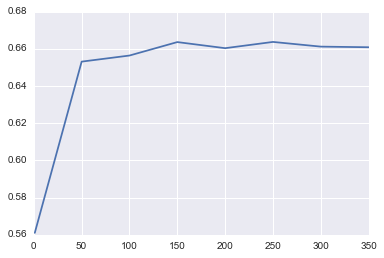

In [27]:
plt.plot(estimators, accuracylist)

In [28]:
max_features = []
max_feataccuracylist = []
for i in range(5, 58, 5):
    model = RandomForestClassifier(n_estimators=200, max_features=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    max_feataccuracylist.append(accuracy)
    max_features.append(i)

5: 0.662266689087
10: 0.659492180932
15: 0.661762233059


KeyboardInterrupt: 

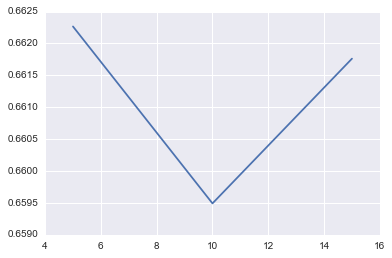

In [29]:
plt.plot(max_features, max_feataccuracylist)

In [30]:
min_sample_leaf= []
min_sample_leaf_accuracylist = []
for i in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators=200, min_samples_leaf=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    min_sample_leaf_accuracylist.append(accuracy)
    min_sample_leaf.append(i)


1: 0.660332940979
11: 0.665629729275
21: 0.662182613082
31: 0.657810660837
41: 0.657642508828
51: 0.657053976795
61: 0.65570876072
71: 0.657390280814
81: 0.65570876072
91: 0.65554060871


In [ ]:
plt.plot(min_sample_leaf, min_sample_leaf_accuracylist)

In [ ]:
len(names)

In [ ]:
X.columns.values()

In [ ]:
from sklearn.cross_validation import cross_val_score
import numpy as np
def meanCVscore(estimator, X, y):
    scores = cross_val_score(estimator, X, y)
    mean = np.mean(scores)
    print('model: ' + str(estimator), ' Mean Accuacy: ' + str(mean))

In [ ]:
meanCVscore(RandomForestClassifier(n_estimators=200), X, y)

In [ ]:
logisticmodel = LogisticRegression()
logisticmodel = logisticmodel.fit(X_train, y_train) 
y_pred = logisticmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ('accuracy:', accuracy ,'\n')
print ("Coefficients:")
coefs = [logisticmodel.intercept_[0]]
for coef in logisticmodel.coef_[0]:
    coefs.append(coef)  
print ('Intercept:', coefs[0])
for i in range(1,len(coefs)):
    
    print (str(names[i]) + ': ' + str(coefs[i]))

In [ ]:
def modelaccuracy(alg, X_train, X_test, y_train, y_test):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: ' + str(accuracy))
    print(classification_report(y_test, y_predict))
    

print ('Model: KNN')
modelaccuracy(KNeighborsClassifier(n_neighbors=29), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Logistic Regression')
modelaccuracy(LogisticRegression(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Gaussian NB')
modelaccuracy(GaussianNB(), X_train, X_test, y_train, y_test) 
print('\n')
# print ('Model: SVC')
# modelaccuracy(SVC(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Decision Tree')
modelaccuracy(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(), X_train, X_test, y_train, y_test)

In [ ]:
names = list(X.columns.values)


In [ ]:
names